In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load in data
df = pd.read_csv('retail_price.csv')

### Summary Statistics

In [9]:
df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


Sales Information:

* Quantity (qty) sold per transaction has a wide range from a minimum of 1 to a maximum of 122, averaging about 14.5. This indicates significant variability in the order sizes.
* The total price (total_price) of products in each transaction ranges from as low as 19.9 to a staggering 12095, suggesting a broad spectrum of order values.
* The unit price (unit_price) averages at around 106.5, with the most expensive item costing 364 and the cheapest one being 19.9.

Product Information:

* The product names are relatively brief, ranging from 29 to 60 characters in length, averaging about 48.7 characters.
* The product descriptions, however, are much longer, averaging 767.4 characters.
* On average, a product has about 2 photos (product_photos_qty), which varies from 1 to 8 photos.
* The weight (product_weight_g) of the products also varies significantly, from as light as 100 grams to as heavy as 9750 grams.
* Customers seem reasonably satisfied with the products, as indicated by the average product score of 4.08, with a maximum of 4.5.

Customer Information:

* On average, about 81 customers are associated with each transaction, with the maximum number of customers in a single transaction being 339.

Temporal Information:

* The data ranges from January 2017 to January 2018.
* Most transactions occur on weekdays (weekday) with an average of 21.77, while weekends (weekend) see less activity with an average of 8.66.
* Holidays (holiday) have the least transactions with an average of 1.49.

Competitor Information:

* The competitors' prices (ps1, ps2, ps3) and freight prices (fp1, fp2, fp3) vary, with the averages for unit prices being around 79.45, 92.93, and 84.18 respectively, and freight prices being around 4.16, 4.12, and 4 respectively. This indicates competition in pricing and shipping costs.

Lag Price:

* The lag price, which could be the price of the product in the previous period, averages around 107.4. This might be useful in understanding price trends.

Other variables:

* Volume (volume), possibly referring to the total volume of sales, averages around 10664.63.

In [10]:
import pandas as pd 

class DataQualityChecks:
        """
    A class used to perform basic data quality checks on a pandas DataFrame.

    ...

    Attributes
    ----------
    df : pandas.DataFrame
        The DataFrame on which the checks are to be performed.

    Methods
    -------
    check_missing_values():
        Checks for missing values in DataFrame and returns a Series where each 
        index is the column name and the value is the number of missing values in that column.

    check_duplicates():
        Checks for duplicate rows in DataFrame and returns the total number of duplicate rows.

    check_data_types():
        Checks the data types of columns in DataFrame and returns a Series where each index 
        is the column name and the value is the data type of that column.
    """
        
        def __init__(self, df: pd.DataFrame):
            """
            Parameters
            ----------
            df : pandas.DataFrame
                The DataFrame on which the checks are to be performed.
            """
            self.df = df 
        
        def check_missing_values(self) -> pd.Series:
            """
        Checks for missing values in DataFrame.

        Returns
        -------
        pandas.Series
            A Series where each index is the column name and the value is the number of 
            missing values in that column.
        """
            missing_values = self.df.isnull().sum()
            return missing_values
        
        def check_duplicates(self) -> int:
                     """
        Checks for duplicate rows in DataFrame.

        Returns
        -------
        int
            The total number of duplicate rows.
        """
                     duplicate_rows = self.df.duplicated().sum()
                     return duplicate_rows
        
        def check_data_types(self) -> pd.Series:
                       """
        Checks the data types of columns in DataFrame.

        Returns
        -------
        pandas.Series
            A Series where each index is the column name and the value is the data type of 
            that column.
        """
                       data_types = self.df.dtypes
                       return data_types
        
# Suppose df is your DataFrame
quality_checker = DataQualityChecks(df)

missing_values = quality_checker.check_missing_values()
print("Missing Values: \n", missing_values)

duplicates = quality_checker.check_duplicates()
print("Duplicate Rows: \n", duplicates)

data_types = quality_checker.check_data_types()
print("Data Types: \n", data_types)

Missing Values: 
 product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64
Duplicate

                                 qty  total_price  freight_price  unit_price  \
qty                         1.000000     0.749605      -0.135521   -0.103432   
total_price                 0.749605     1.000000       0.025848    0.409001   
freight_price              -0.135521     0.025848       1.000000    0.203659   
unit_price                 -0.103432     0.409001       0.203659    1.000000   
product_name_lenght         0.079973    -0.002594       0.013398   -0.170613   
product_description_lenght -0.022749     0.175376       0.423219    0.280176   
product_photos_qty          0.128515     0.157945      -0.200990    0.076990   
product_weight_g           -0.034301     0.060092       0.670689    0.112958   
product_score              -0.004028     0.036119       0.199468    0.042162   
customers                   0.441547     0.386389       0.088261    0.043391   
weekday                     0.030918     0.018798      -0.016132   -0.011949   
weekend                    -0.075118    

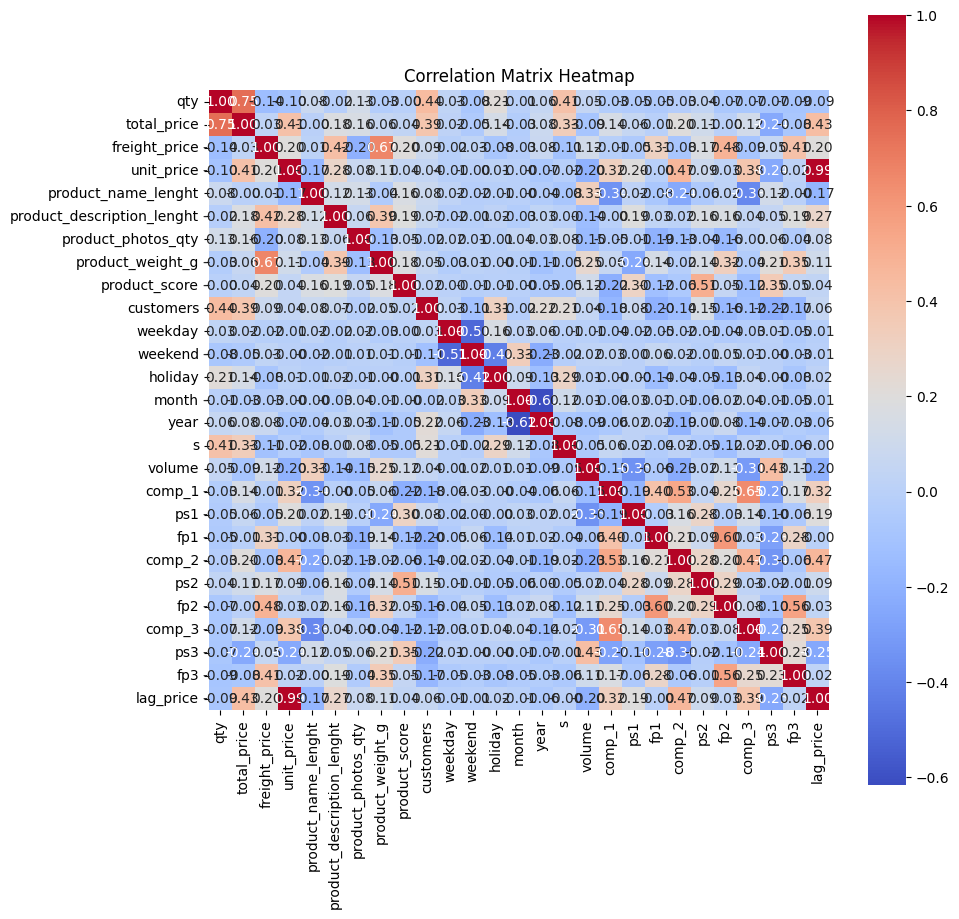

In [13]:
import numpy as np

class CorrelationAnalysis:
        """
    A class used to perform correlation analysis on a pandas DataFrame.

    ...

    Attributes
    ----------
    df : pandas.DataFrame
        The DataFrame on which the analysis is to be performed.

    Methods
    -------
    calculate_correlation(method='pearson'):
        Calculates correlation matrix using specified method.

    plot_correlation_matrix():
        Plots a heatmap of the correlation matrix.
    """
        def __init__(self, df: pd.DataFrame):
                """
        Parameters
        ----------
        df : pandas.DataFrame
            The DataFrame on which the analysis is to be performed.
        """
                self.df = df.select_dtypes(include=[np.number]) # Select only numerical columns 
                self.Correlation_matrix = None
        
        def calculate_correlation(self, method = 'pearson') -> pd.DataFrame:
                        """
        Calculates correlation matrix using specified method.

        Parameters
        ----------
        method : str, optional
            Method of correlation:
            - pearson : standard correlation coefficient
            - kendall : Kendall Tau correlation coefficient
            - spearman : Spearman rank correlation

        Returns
        -------
        pandas.DataFrame
            Correlation matrix
        """
                        self.Correlation_matrix = self.df.corr(method=method)
                        return self.Correlation_matrix
        
        def plot_correlation_matrix(self):
                        """
        Plots a heatmap of the correlation matrix.
        """
                        if self.Correlation_matrix is None:
                                raise ValueError("Correlation matrix is not calculated. Please run 'calculate_correlation()' first.")
                        else:
                                plt.figure(figsize=(10,10))
                                sns.heatmap(self.Correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
                                plt.title("Correlation Matrix Heatmap")
                                plt.show()

corr_analysis = CorrelationAnalysis(df)
corr_matrix = corr_analysis.calculate_correlation()
print(corr_matrix)

# Convert corr_matrix into df and then save it to csv
corr_matrix.to_csv('corr_matrix.csv')
corr_analysis.plot_correlation_matrix()

* qty and total_price have a strong positive correlation (0.75), meaning that as the quantity of an item increases, the total price also tends to increase.
* freight_price and product_weight_g have a very high positive correlation (0.67), which indicates that the heavier the product, the higher the freight price, which is expected.
* unit_price and total_price show a moderate positive correlation (0.41), indicating that the total price tends to increase as the unit price increases.
* unit_price has a very strong positive correlation (0.99) with the volume, suggesting that as the volume of the product increases, so does its unit price.
* customers have a moderately strong positive correlation with qty (0.44), indicating that with more customers, the quantity of items sold increases.
* weekday and weekend have a strong negative correlation (-0.51) which means typically when it's a weekday, it's not a weekend and vice versa.
* freight_price and product_description_lenght have a moderate positive correlation (0.42), suggesting that products with * 

* longer descriptions tend to have higher freight prices. However, the reason for this is unclear and could be coincidental.
* product_score and ps3 show a strong positive correlation (0.35), implying that the two variables increase together.

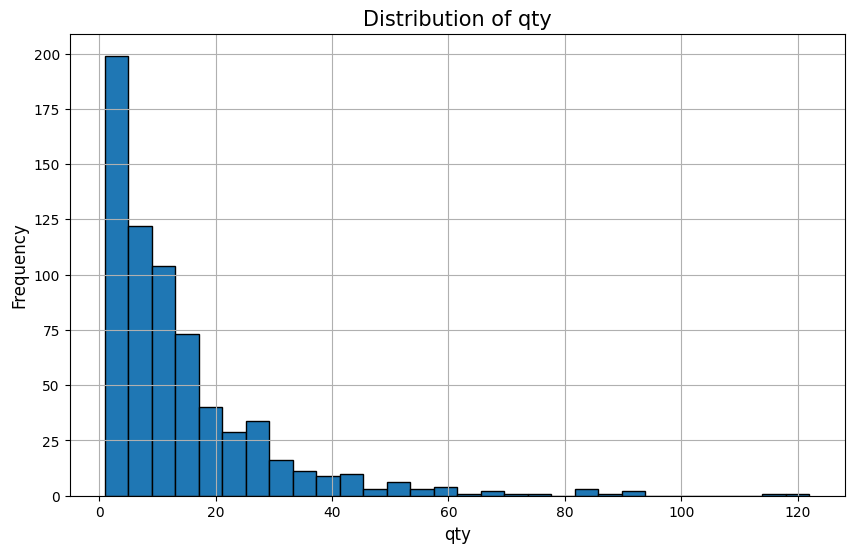

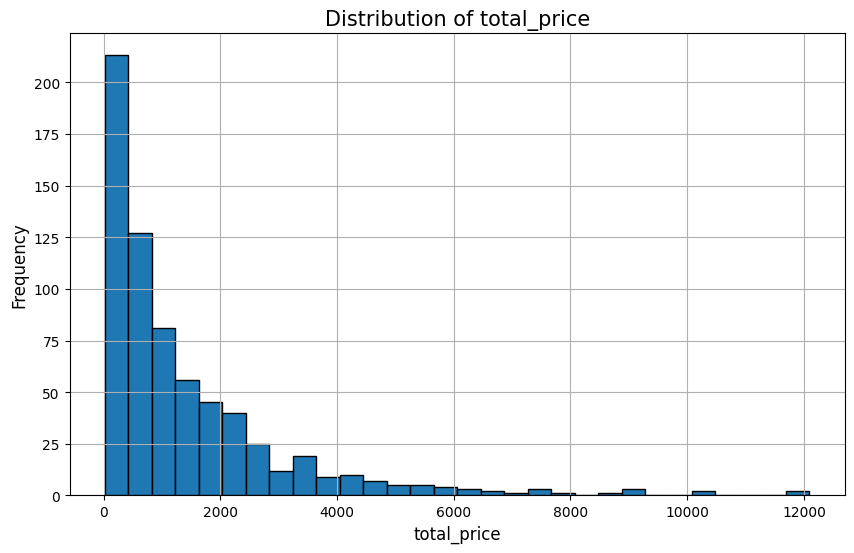

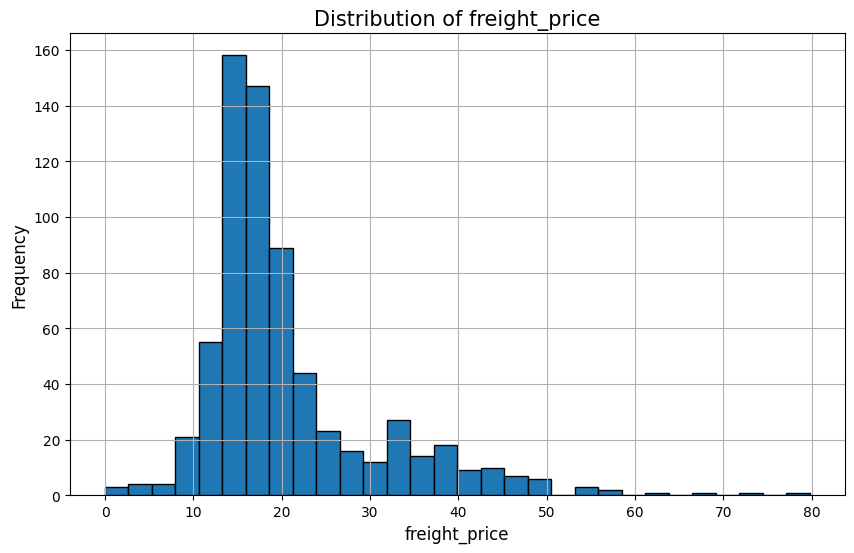

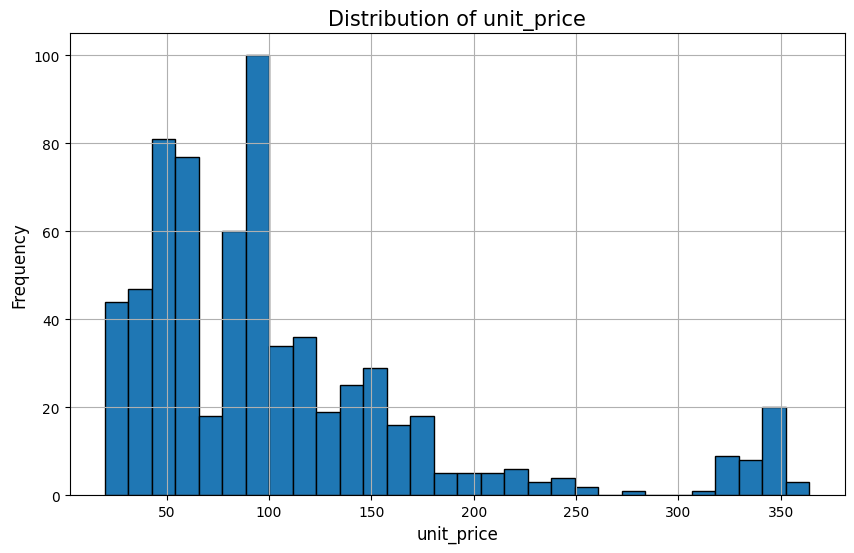

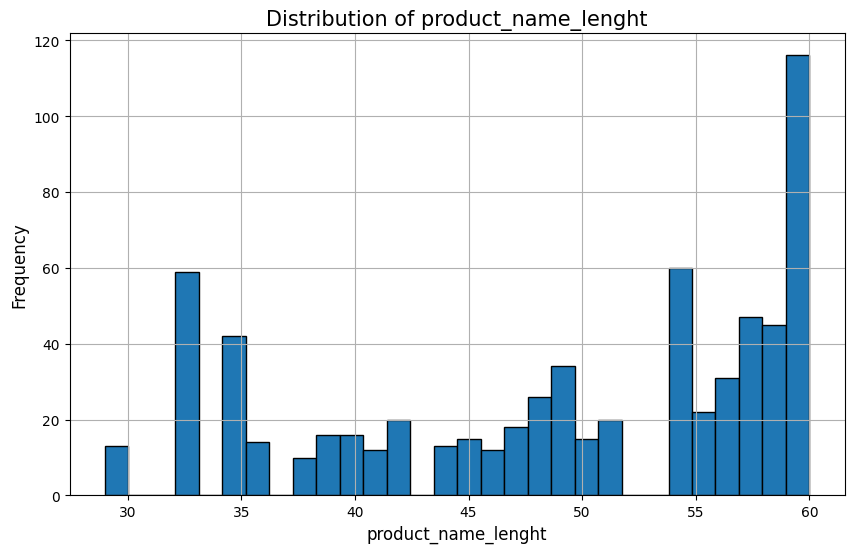

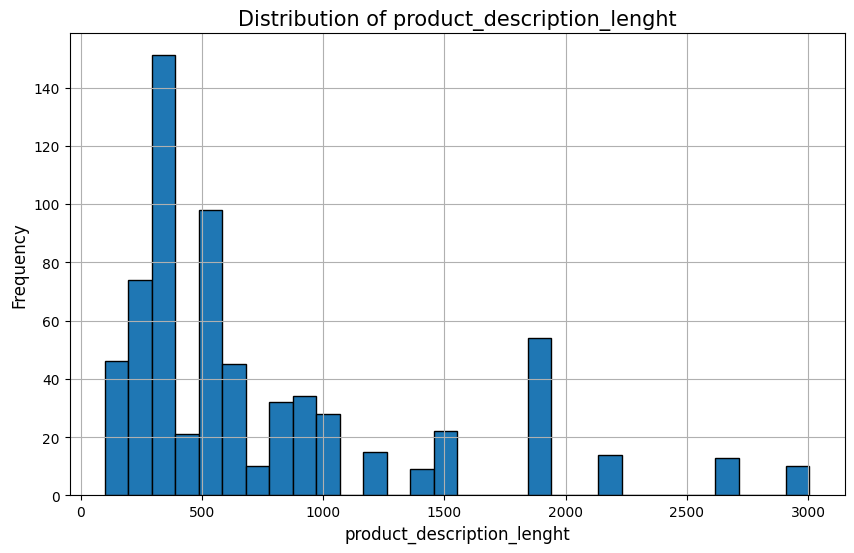

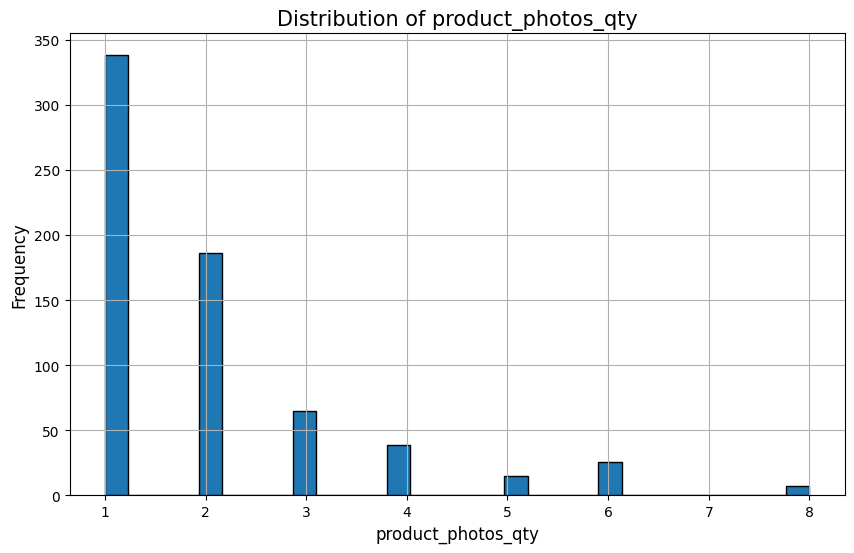

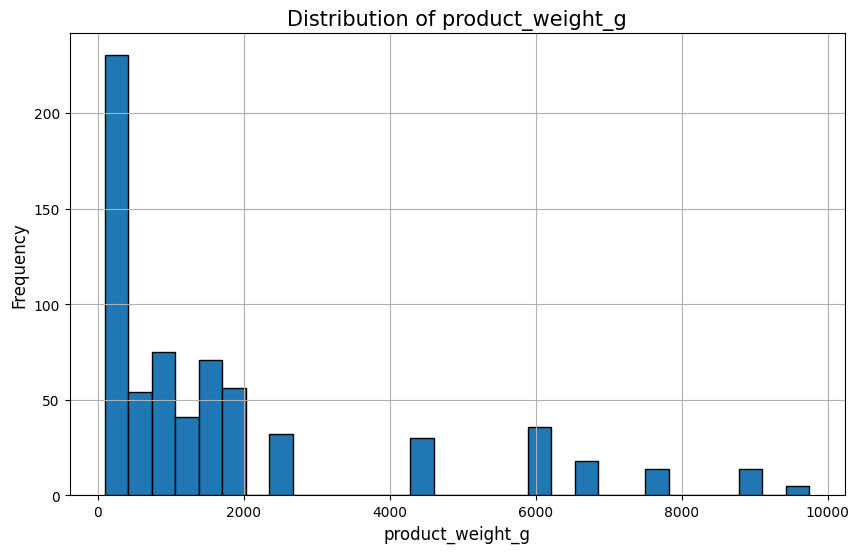

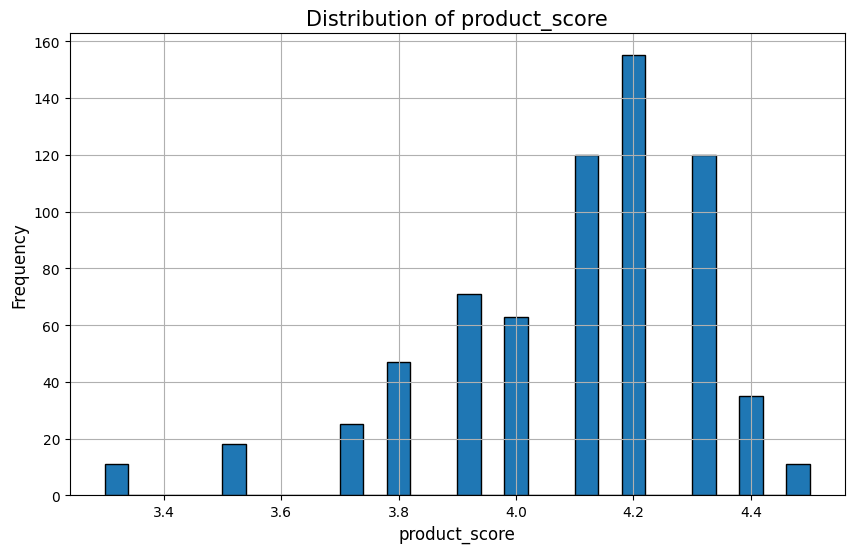

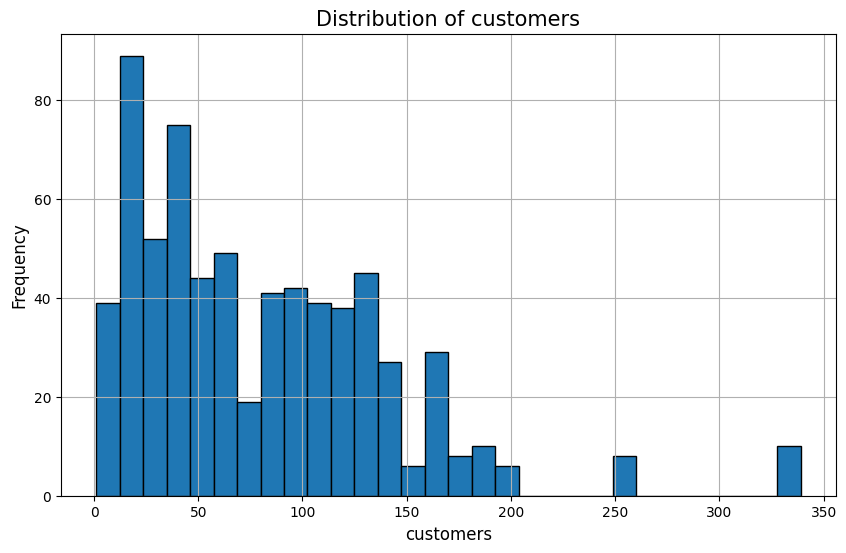

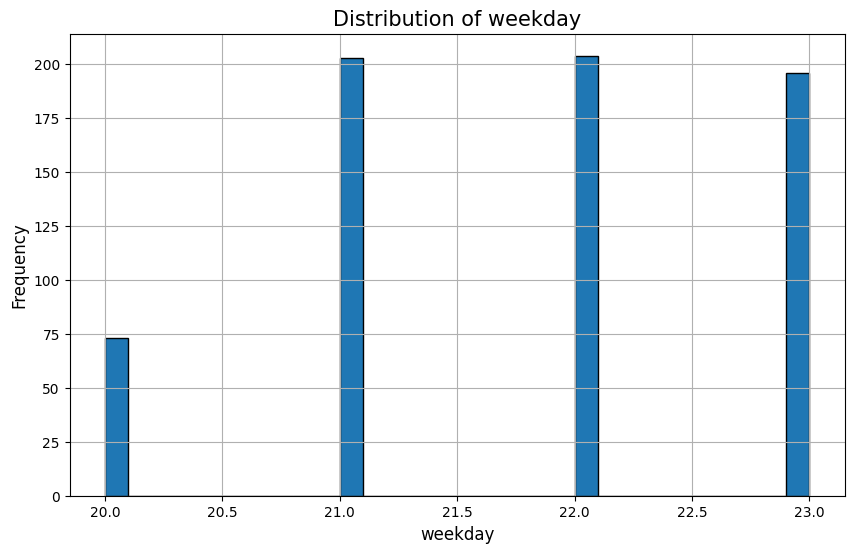

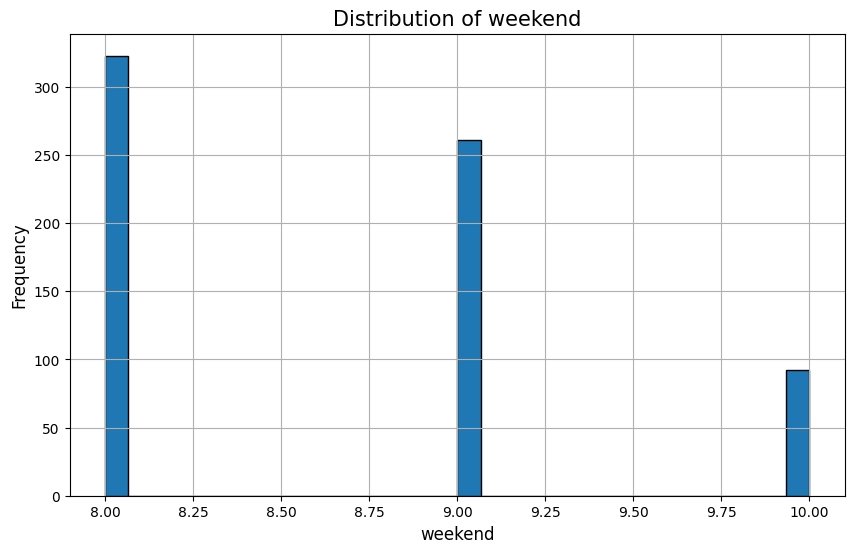

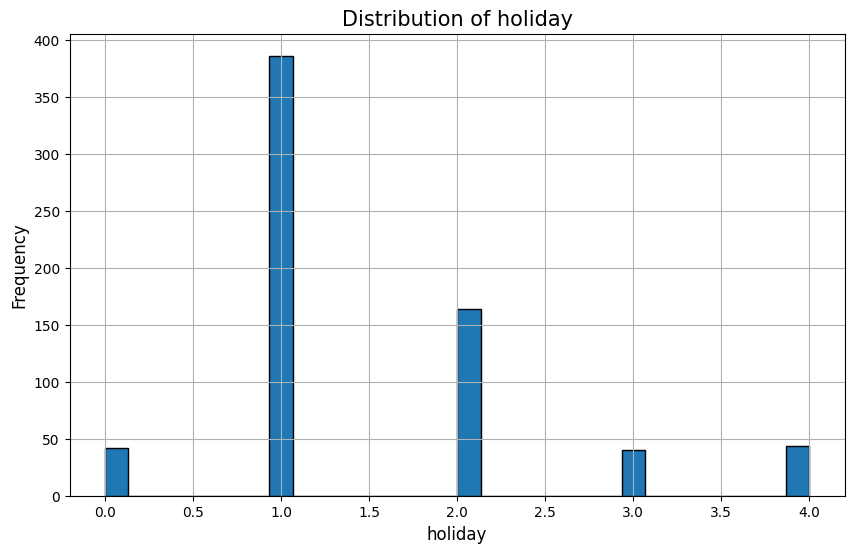

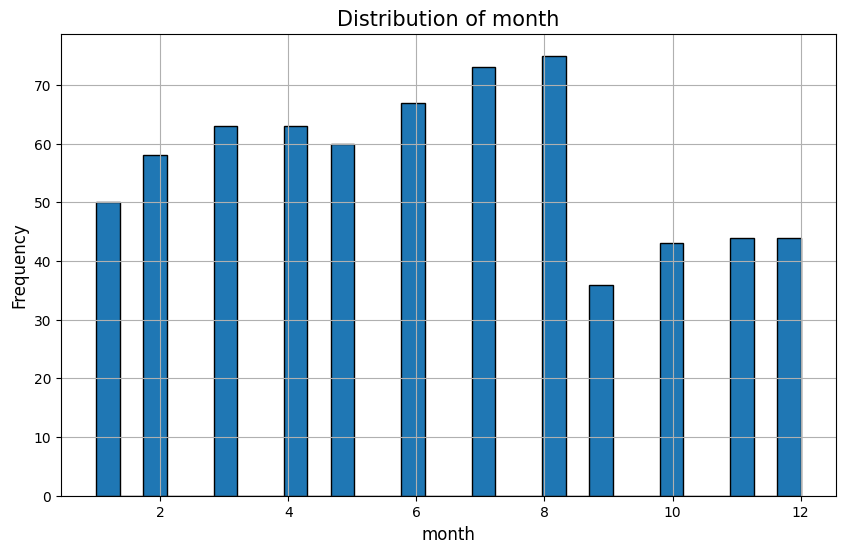

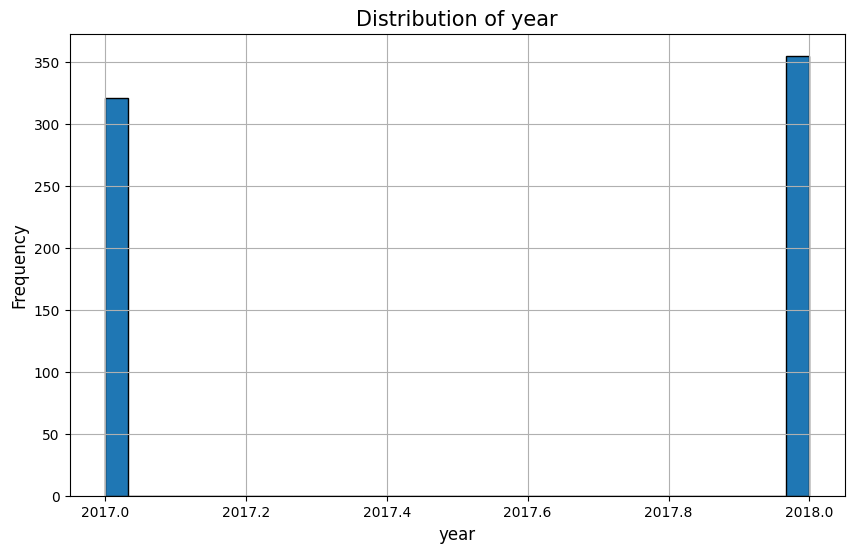

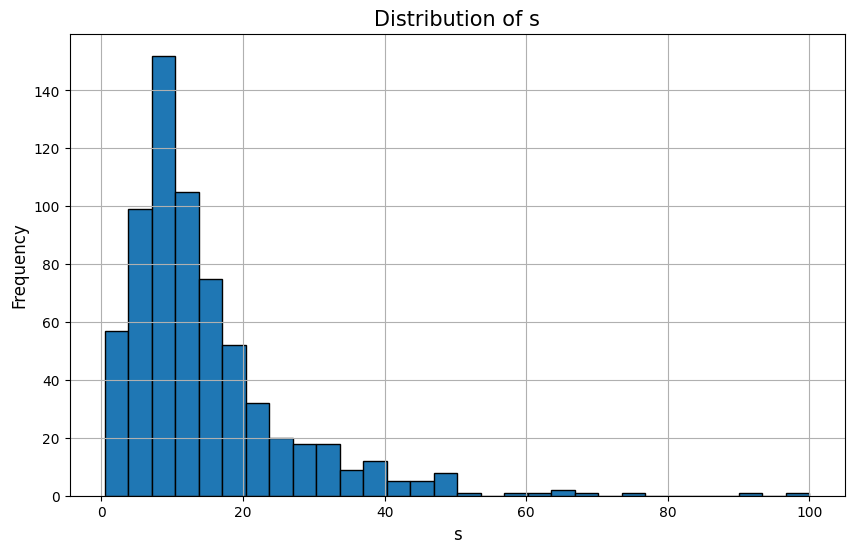

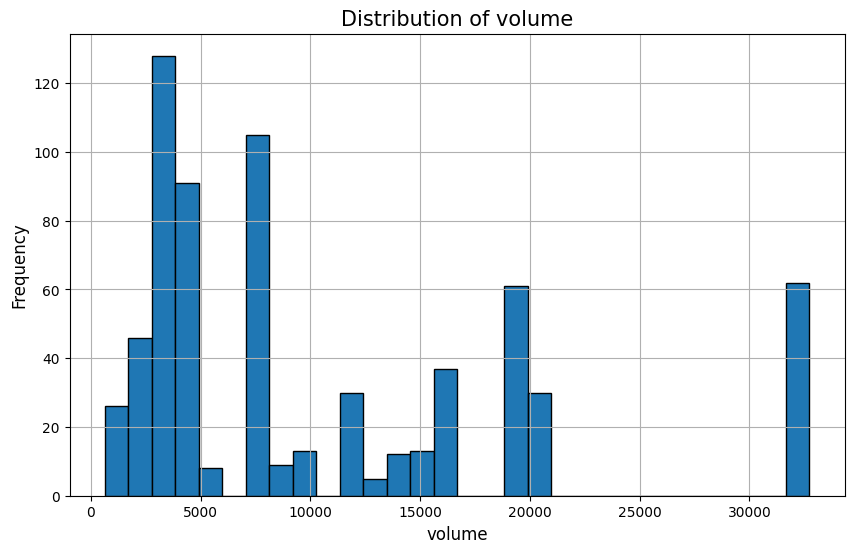

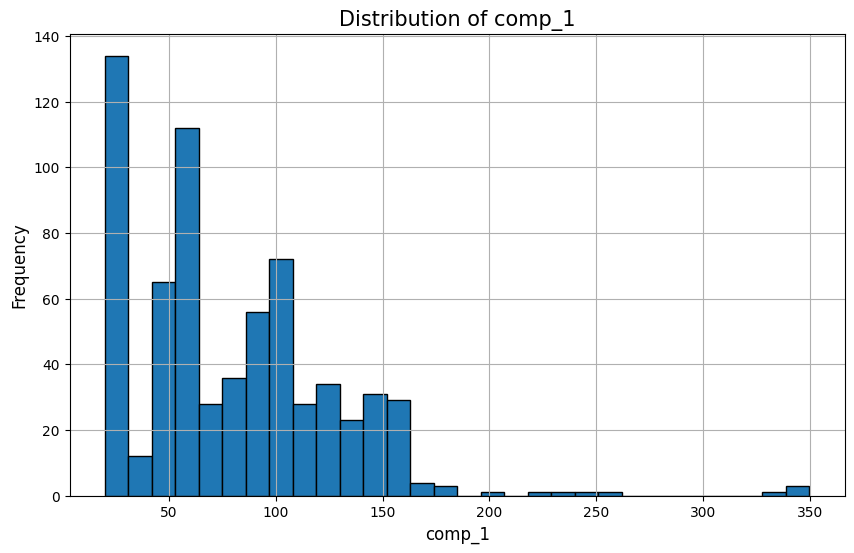

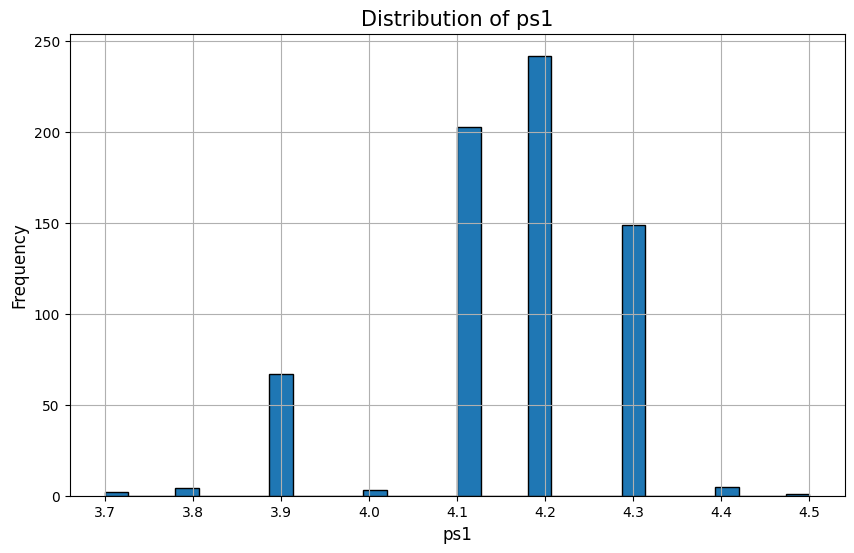

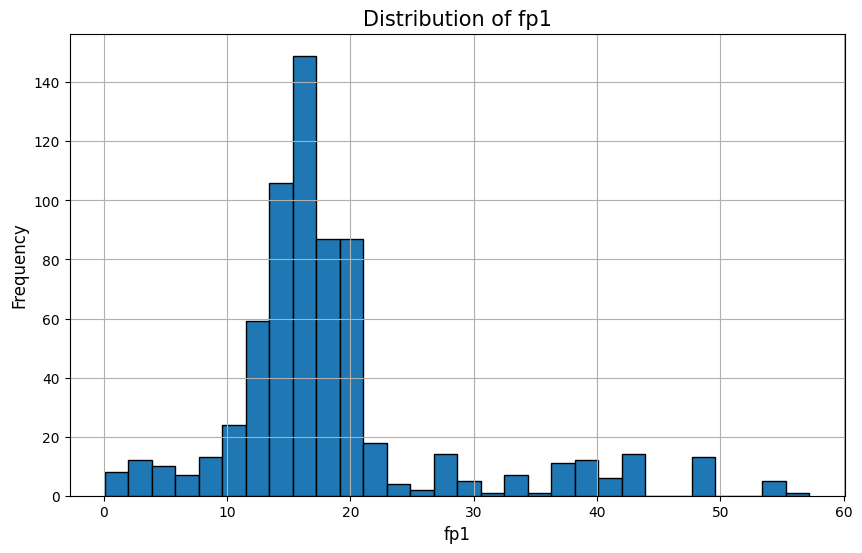

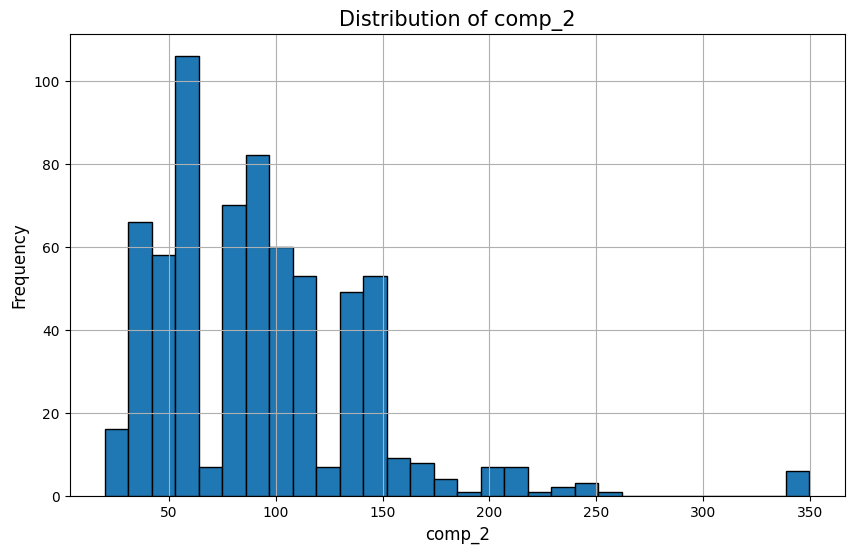

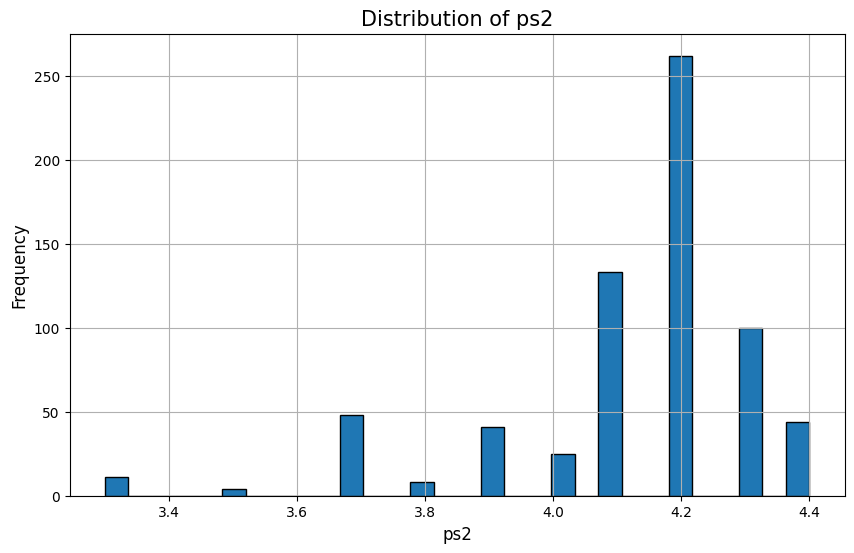

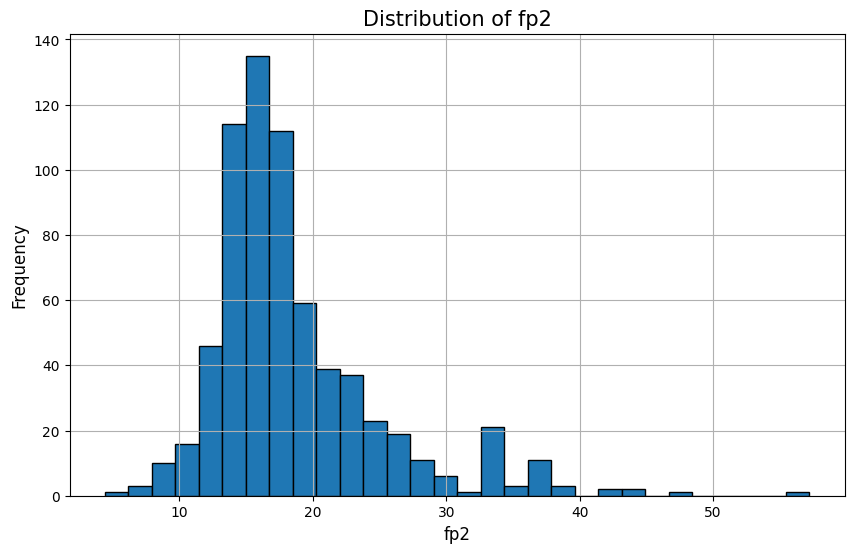

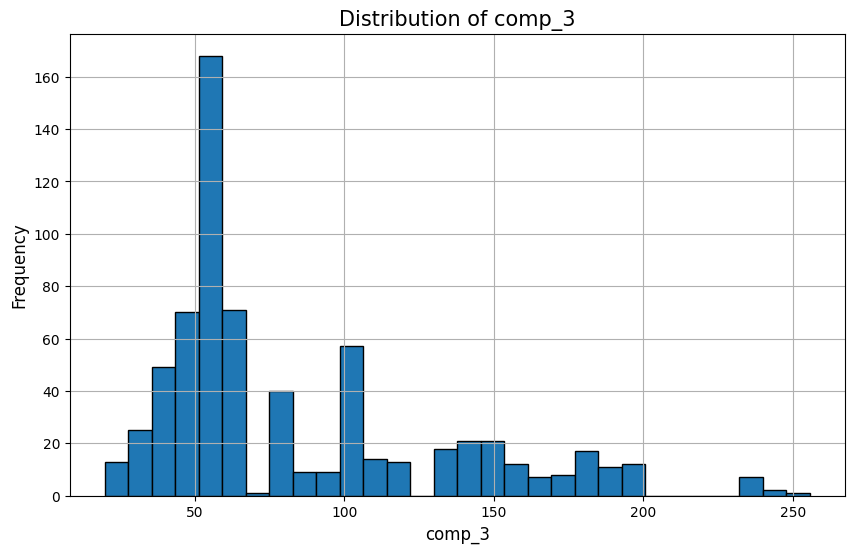

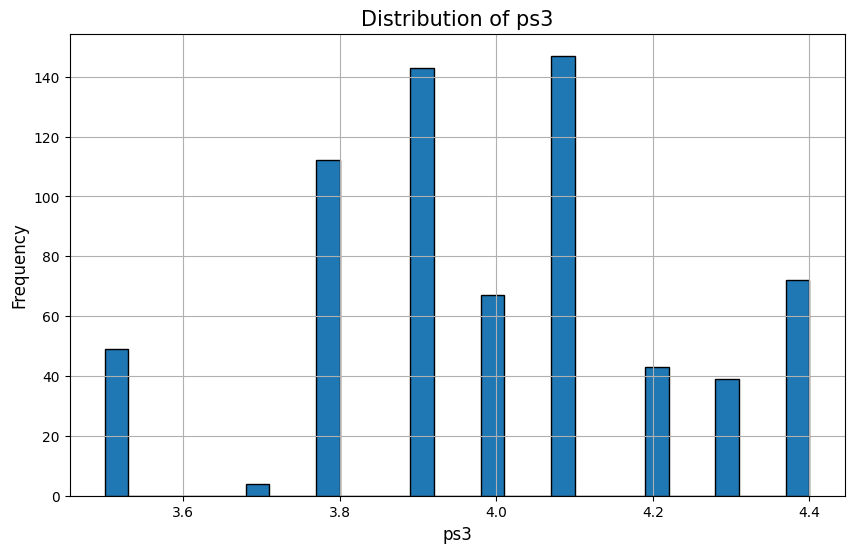

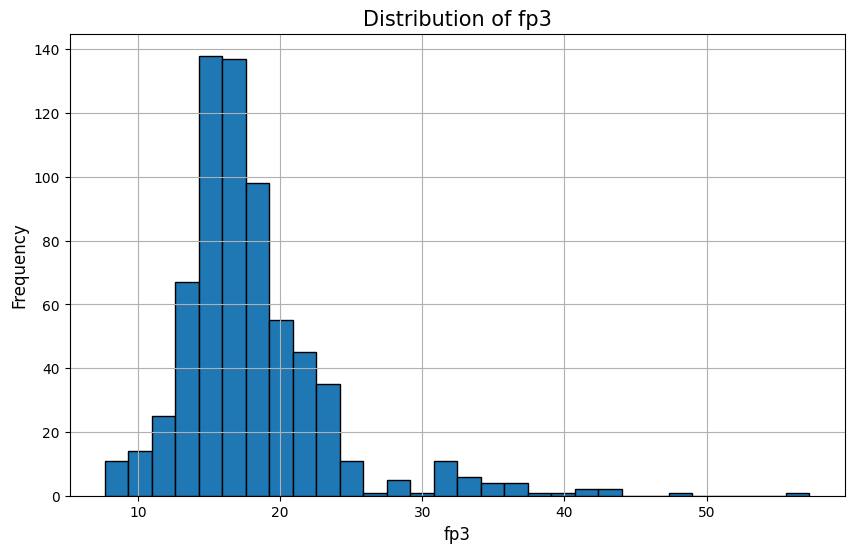

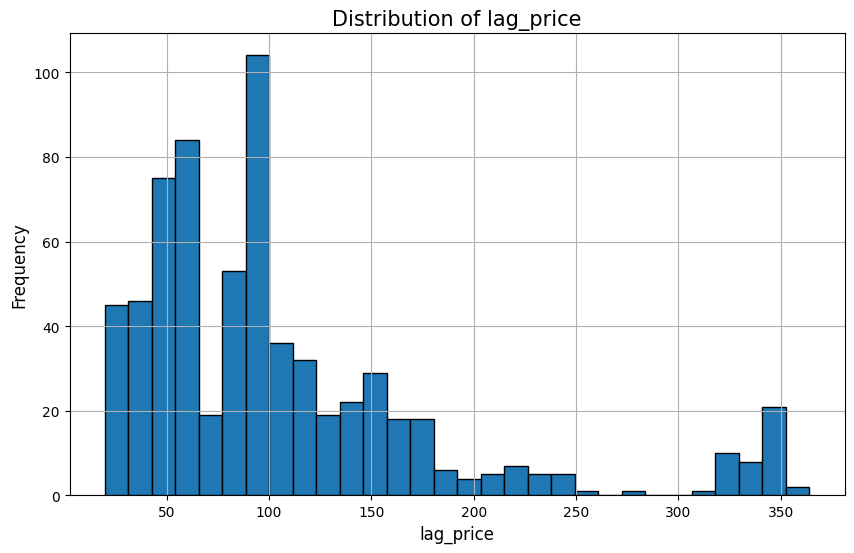

In [14]:
# Assuming your DataFrame is named 'df'
numeric_cols = df.select_dtypes(include=[np.number]).columns.to_list()

for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    df[col].hist(bins=30, edgecolor = "black")
    plt.title(f'Distribution of {col}',fontsize=15)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize = 12)
    plt.show()

#### Interpretation of distributions

* Center: This is the measure of central tendency and can be gauged by the mean or median. If the data is symmetric, the mean and median will be approximately the same.

* Spread: This is the measure of how spread out your data is. It is usually represented by variance or standard deviation. A larger spread means the data is more spread out (more variability), while a smaller spread means the data points are closer together.

* Shape: The shape of the distribution can be symmetric (the left half is a mirror image of the right half), skewed to the left (long tail to the left), or skewed to the right (long tail to the right).

* Outliers: Outliers are extreme values that fall far from the bulk of the data. They can often be seen as isolated bars in a histogram or as points that fall far from the main density plot.

* Modality: Modality refers to the number of peaks or modes in the distribution. A distribution could be unimodal (one peak), bimodal (two peaks), or multimodal (more than two peaks).

So for each distribution, you could make statements such as:

*  "The distribution of column_name is right-skewed, indicating that most of the values are concentrated on the left side with a long tail extending to the right. This suggests that there are a significant number of higher-than-average outliers."

* "The distribution of column_name is symmetric and unimodal, which suggests that the data is evenly distributed around the mean."

* "The distribution of column_name shows clear evidence of bimodality, suggesting that there may be two distinct groups within this variable."



In [15]:
class CategoricalDataAnalysis:
        """
    A class used to analyze categorical data in a DataFrame.

    ...

    Attributes
    ----------
    data : pd.DataFrame
        a pandas DataFrame containing the data

    Methods
    -------
    count_categories(column_name: str) -> pd.Series
        Returns a Series object counting the occurrences of each unique category in the specified column.
    
    visualize_categories(column_name: str, figsize: tuple = (10, 6)):
        Plots a bar plot of the count of unique categories in the specified column.
    """
        def __init__(self, data: pd.DataFrame):
                        """
        Constructs all the necessary attributes for the CategoricalDataAnalysis object.

        Parameters
        ----------
        data : pd.DataFrame
            a pandas DataFrame containing the data
        """
                        self.data = data
        
        def count_categories(self, column_name: str) -> pd.Series:
                        """
        Counts the occurrences of each unique category in the specified column.

        Parameters
        ----------
        column_name : str
            The name of the column to count the unique categories.

        Returns
        -------
        pd.Series
            A Series object with the count of each unique category in the specified column.
        """
                        return self.data[column_name].value_counts()
        
        def visualize_categories(self, column_name: str, figsize: tuple = (10, 10)):
                        """
        Plots a bar plot of the count of unique categories in the specified column.

        Parameters
        ----------
        column_name : str
            The name of the column to visualize.
        figsize : tuple
            The size of the figure to create. Default is (10, 6).

        Returns
        -------
        None
        """ 
                        self.data[column_name].value_counts().plot(kind='bar', figsize=figsize)
                        plt.title(f'Distribution of {column_name}')
                        plt.xlabel('Category')
                        plt.ylabel('Count')
                        plt.show()

product_category_name
garden_tools             160
health_beauty            130
watches_gifts            103
computers_accessories     69
bed_bath_table            61
cool_stuff                57
furniture_decor           48
perfumery                 26
consoles_games            22
Name: count, dtype: int64


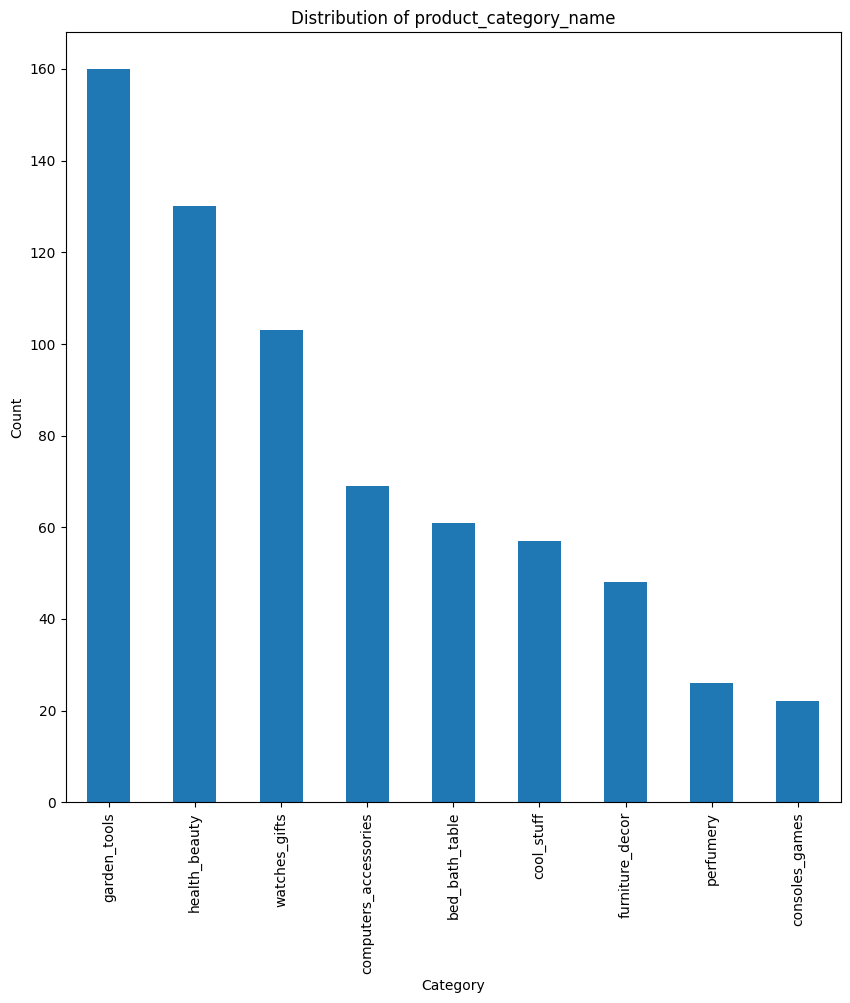

In [16]:
# Create a Instance of the CategoricalDataAnalysis Class 
cat_analysis = CategoricalDataAnalysis(df)

# Count Unique Categories in a column 
print(cat_analysis.count_categories('product_category_name'))

# Visualize the unique categories in a column 
cat_analysis.visualize_categories('product_category_name')

### Descriptive Statistics: 

* Quantity (qty): The average quantity sold per product is about 14.5 units with a standard deviation of 15.44 units, indicating wide variation in quantity sold. The range of quantity sold varies from a minimum of 1 to a maximum of 122 units.

* Total Price (total_price): The average total price of a product sold is approximately $1422.71 with a standard deviation of about $1700.12, indicating a high variation in prices. Prices range from a minimum of $19.9 to a maximum of $12095.

* Freight Price (freight_price): The average freight price is about $20.68 with a standard deviation of $10.08, indicating moderate variation. Freight prices range from $0 to $79.76.

* Unit Price (unit_price): The average unit price is approximately $106.50 with a standard deviation of about $76.18. This suggests significant variability in the types of products in the dataset. The unit price ranges from $19.9 to $364.0.

* Product Attributes: On average, product names have about 48.7 characters and product descriptions have a mean length of around 767.4 characters. On average, products have about 2 photos. These attributes suggest an emphasis on detailed product information and visualization.

* Product Weight (product_weight_g): The mean weight of a product is approximately 1847.5 grams, indicating variability in product types. The weight ranges from 100 grams to 9750 grams.

* Product Score (product_score): The average product score is about 4.09, indicating generally high customer satisfaction. The scores range from 3.3 to 4.5, indicating good product quality.

* Customers (customers): The average number of customers per product is about 81, indicating some products have significantly higher popularity.

* Weekday/Weekend/Holiday Sales: The average weekday score is 21.77, weekend score is 8.66, and holiday score is 1.49. This suggests that sales activity is more prominent on weekdays.

* Month and Year (month, year): These provide insights into the temporal distribution of sales. The data is mainly from the years 2017 and 2018.

* Volume (volume): The average volume of a product is approximately 10664.63 cubic cm, indicating significant variation in product sizes.

*  Competitor Prices (comp_1, comp_2, comp_3): The prices of all three competitors show significant variation, suggesting a competitive market.

### Correlation Analysis:

* qty and total_price: There is a strong positive correlation, indicating that as the quantity sold increases, the total price also increases. This is expected as total price is dependent on quantity.

* unit_price and comp_1, comp_2, comp_3 prices: There may be a positive correlation, suggesting that our product prices tend to align with those of competitors.

* product_weight_g and freight_price: There may be a positive correlation, which is reasonable as heavier products usually cost more to ship.

* product_score and customers: There is potentially a positive correlation between product score and the number of customers. Products with higher scores may attract more customers.